In [123]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

In [124]:
# Load The Data from MNIST
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,

)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [125]:
loaders = {
    'train': DataLoader(train_data, batch_size = 100, shuffle = True,),
    'test': DataLoader(test_data, batch_size = 100 , shuffle = True,)
}

In [126]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self,x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x = x.view(-1 , 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x , training=self.training)
    x= self.fc2(x)
    return F.softmax(x , dim=1)

In [127]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
def train(epoch):
  model.train()
  for batch_index , (data,target) in enumerate(loaders['train']):
    data,target = data.to(device),target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output,target)
    loss.backward()
    optimizer.step()
    if batch_index % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_index * len(data)}/{len(loaders["train"].dataset)}({100. * batch_index / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in loaders['test']:
      print("data size",data.size())
      data , target = data.to(device) , target.to(device)
      output = model(data)
      test_loss += loss_fn(output,target).item()
      prediction = output.argmax(dim = 1, keepdim = True)
      correct += prediction.eq(target.view_as(prediction)).sum().item()
  test_loss /= len(loaders['train'].dataset)
  print(f"\n Test set: Average Loss: {test_loss:.4f},Accuracy {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%n)")

In [128]:
for epoch in range(1,11):
  train(epoch)
  test()

Train Epoch: 1 [0/60000(0%)]	2.298978
Train Epoch: 1 [2000/60000(3%)]	2.292709
Train Epoch: 1 [4000/60000(7%)]	2.185892
Train Epoch: 1 [6000/60000(10%)]	2.014741
Train Epoch: 1 [8000/60000(13%)]	2.003201
Train Epoch: 1 [10000/60000(17%)]	1.879023
Train Epoch: 1 [12000/60000(20%)]	1.783094
Train Epoch: 1 [14000/60000(23%)]	1.807242
Train Epoch: 1 [16000/60000(27%)]	1.750028
Train Epoch: 1 [18000/60000(30%)]	1.746050
Train Epoch: 1 [20000/60000(33%)]	1.667382
Train Epoch: 1 [22000/60000(37%)]	1.699930
Train Epoch: 1 [24000/60000(40%)]	1.694037
Train Epoch: 1 [26000/60000(43%)]	1.624743
Train Epoch: 1 [28000/60000(47%)]	1.626065
Train Epoch: 1 [30000/60000(50%)]	1.677619
Train Epoch: 1 [32000/60000(53%)]	1.674232
Train Epoch: 1 [34000/60000(57%)]	1.641530
Train Epoch: 1 [36000/60000(60%)]	1.664757
Train Epoch: 1 [38000/60000(63%)]	1.614300
Train Epoch: 1 [40000/60000(67%)]	1.611902
Train Epoch: 1 [42000/60000(70%)]	1.681494
Train Epoch: 1 [44000/60000(73%)]	1.635797
Train Epoch: 1 [46000/

Prediction: 4


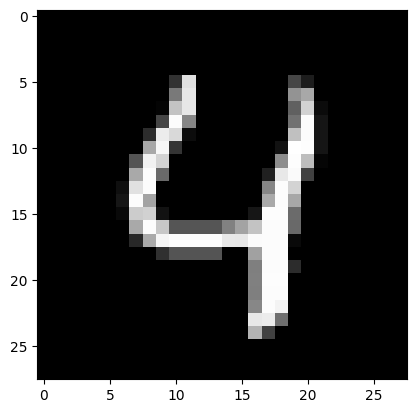

In [122]:
import matplotlib.pyplot as plt
model.eval()
data,target = test_data[4]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f"Prediction: {prediction}")
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image , cmap='gray')
plt.show()